<a href="https://www.kaggle.com/code/samithsachidanandan/bike-sharing-count-prediction?scriptVersionId=275495596" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor



### Loading the Data

In [2]:
hour_df = pd.read_csv("../input/bike-sharing-dataset/hour.csv")

In [3]:
hour_df.rename(columns={'instant':'rec_id',
                        'dteday':'datetime',
                        'holiday':'is_holiday',
                        'workingday':'is_workingday',
                        'weathersit':'weather_condition',
                        'hum':'humidity',
                        'mnth':'month',
                        'cnt':'total_count',
                        'hr':'hour',
                        'yr':'year'},inplace=True)

### Basic Statistics

In [4]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour_df = hour_df.reset_index(drop=True)

In [6]:
hour_df = hour_df.set_index('rec_id')

In [7]:
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

In [8]:
hour_df.head()

,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
rec_id,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
hour_df.shape

(17379, 16)

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           17379 non-null  datetime64[ns]
 1   season             17379 non-null  int64         
 2   year               17379 non-null  int64         
 3   month              17379 non-null  int64         
 4   hour               17379 non-null  int64         
 5   is_holiday         17379 non-null  int64         
 6   weekday            17379 non-null  int64         
 7   is_workingday      17379 non-null  int64         
 8   weather_condition  17379 non-null  int64         
 9   temp               17379 non-null  float64       
 10  atemp              17379 non-null  float64       
 11  humidity           17379 non-null  float64       
 12  windspeed          17379 non-null  float64       
 13  casual             17379 non-null  int64         
 14  registered 

In [11]:
hour_df.dtypes

datetime             datetime64[ns]
season                        int64
year                          int64
month                         int64
hour                          int64
is_holiday                    int64
weekday                       int64
is_workingday                 int64
weather_condition             int64
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

In [12]:
print("Target column statistics (total rental bikes):")

hour_df['total_count'].describe()

Target column statistics (total rental bikes):


count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: total_count, dtype: float64

In [13]:
hour_df.isnull().sum()

datetime             0
season               0
year                 0
month                0
hour                 0
is_holiday           0
weekday              0
is_workingday        0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

In [14]:
print("Duplicated Rows:",hour_df.duplicated().sum())

Duplicated Rows: 0


In [15]:
hour_df.describe().T

,count,mean,min,25%,50%,75%,max,std
datetime,17379,2012-01-02 04:08:34.552045824,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-02 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
season,17379.0,2.50164,1.0,2.0,3.0,3.0,4.0,1.106918
year,17379.0,0.502561,0.0,0.0,1.0,1.0,1.0,0.500008
month,17379.0,6.537775,1.0,4.0,7.0,10.0,12.0,3.438776
hour,17379.0,11.546752,0.0,6.0,12.0,18.0,23.0,6.914405
is_holiday,17379.0,0.02877,0.0,0.0,0.0,0.0,1.0,0.167165
weekday,17379.0,3.003683,0.0,1.0,3.0,5.0,6.0,2.005771
is_workingday,17379.0,0.682721,0.0,0.0,1.0,1.0,1.0,0.465431
weather_condition,17379.0,1.425283,1.0,1.0,1.0,2.0,4.0,0.639357
temp,17379.0,0.496987,0.02,0.34,0.5,0.66,1.0,0.192556


### Exploratory Data Analysis

#### Target Variable Distribution

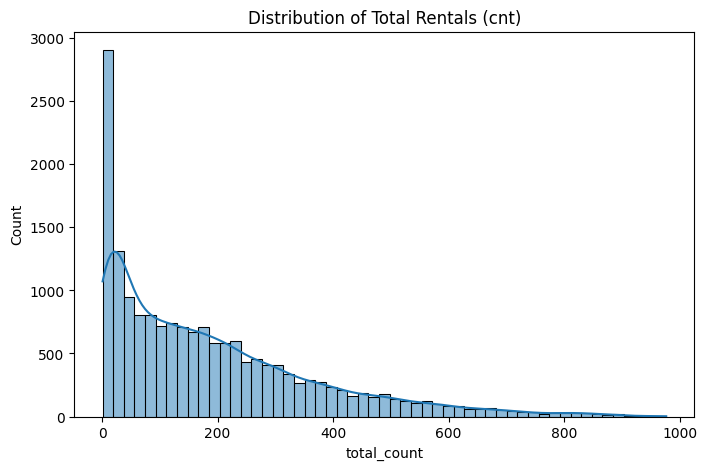

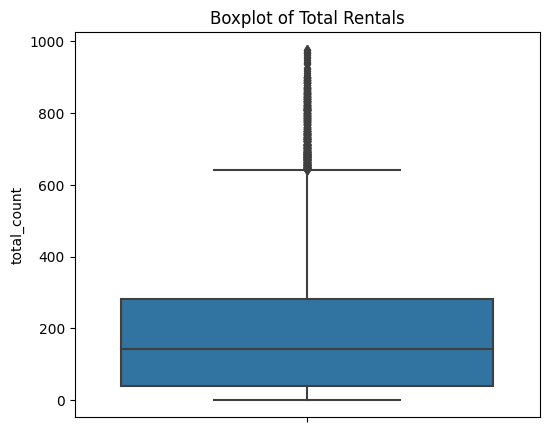

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(hour_df['total_count'], kde=True)
plt.title("Distribution of Total Rentals (cnt)")
plt.show()

plt.figure(figsize=(6, 5))
sns.boxplot(y=hour_df['total_count'])
plt.title("Boxplot of Total Rentals")
plt.show()

#### Daily rentals

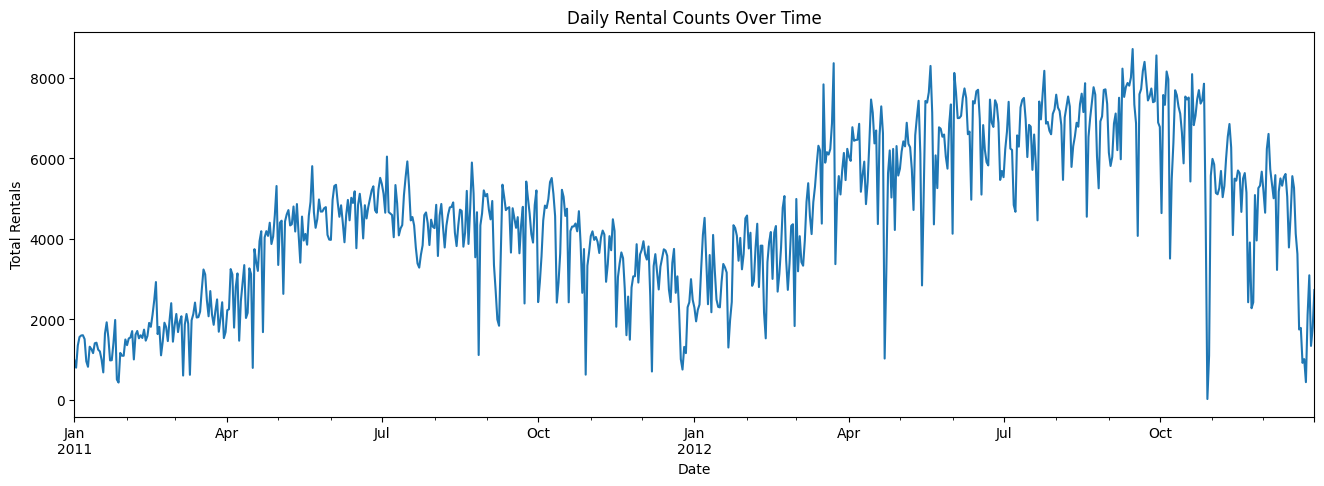

In [17]:
daily_counts = hour_df.groupby('datetime')['total_count'].sum()

plt.figure(figsize=(16, 5))
daily_counts.plot()
plt.title("Daily Rental Counts Over Time")
plt.xlabel("Date")
plt.ylabel("Total Rentals")
plt.show()

#### Hourly trend

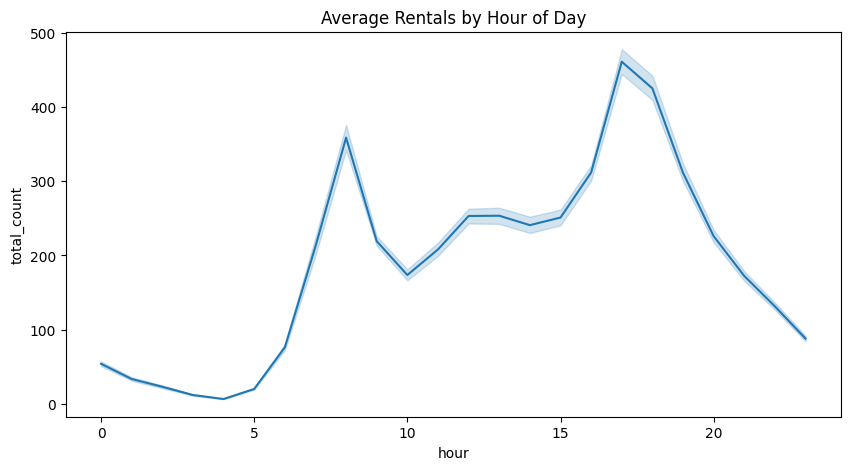

In [18]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hour_df, x='hour', y='total_count', estimator='mean')
plt.title("Average Rentals by Hour of Day")
plt.show()

#### Weekday vs Weekend hourly pattern

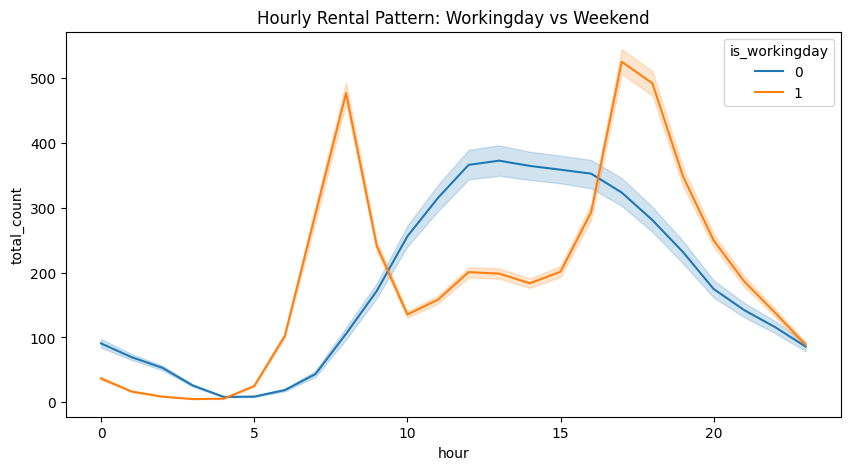

In [19]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hour_df, x='hour', y='total_count', hue='is_workingday', estimator='mean')
plt.title("Hourly Rental Pattern: Workingday vs Weekend")
plt.show()

#### Monthly trend

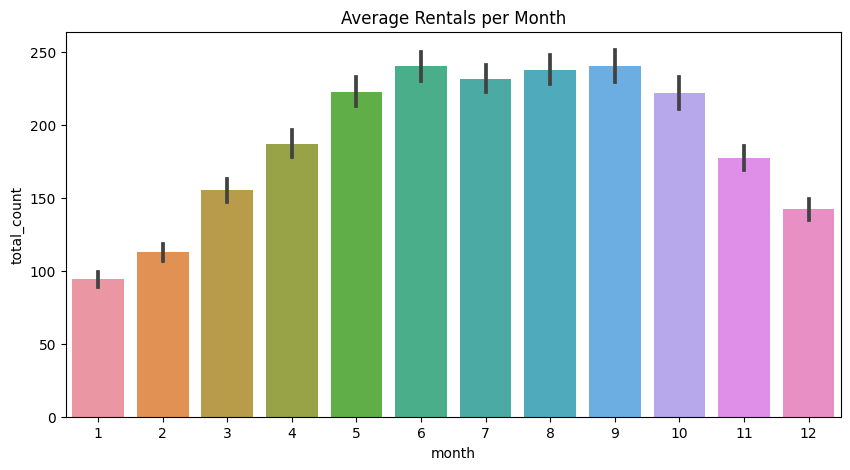

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(data=hour_df, x='month', y='total_count', estimator='mean')
plt.title("Average Rentals per Month")
plt.show()

#### Seasonal trend

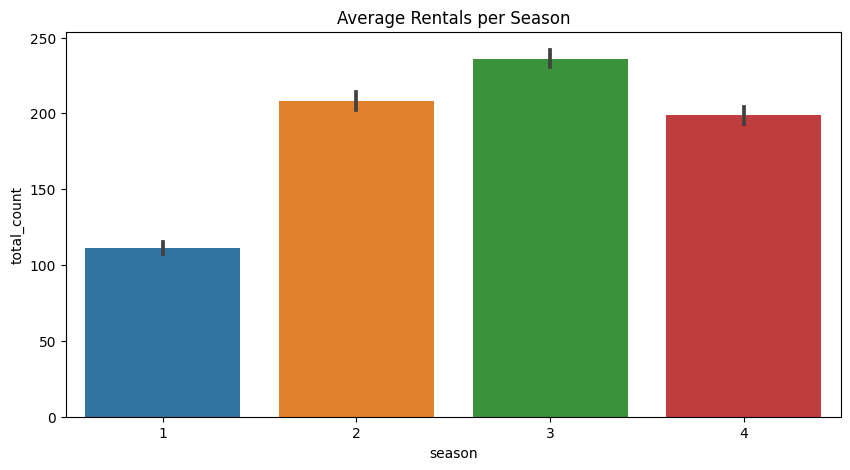

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(data=hour_df, x='season', y='total_count', estimator='mean')
plt.title("Average Rentals per Season")
plt.show()

#### Temperature Impact

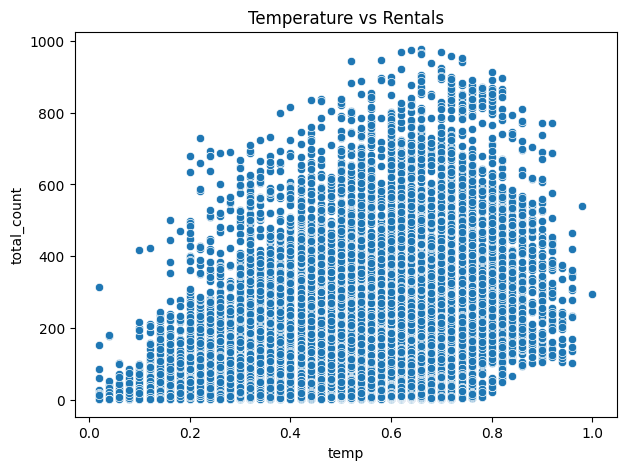

In [22]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=hour_df, x='temp', y='total_count')
plt.title("Temperature vs Rentals")
plt.show()

#### Humidity Impact

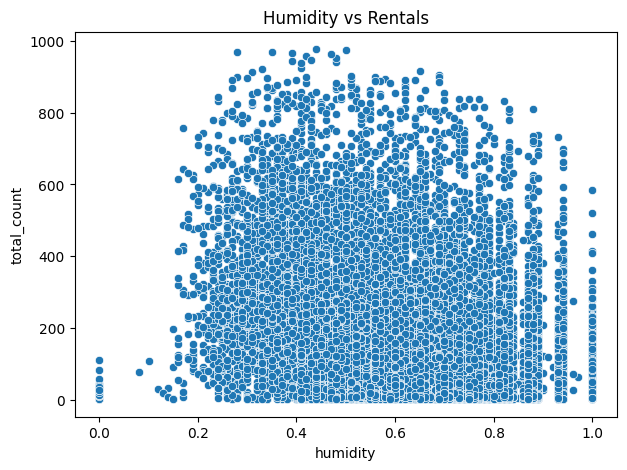

In [23]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=hour_df, x='humidity', y='total_count')
plt.title("Humidity vs Rentals")
plt.show()

#### Windspeed Impact 

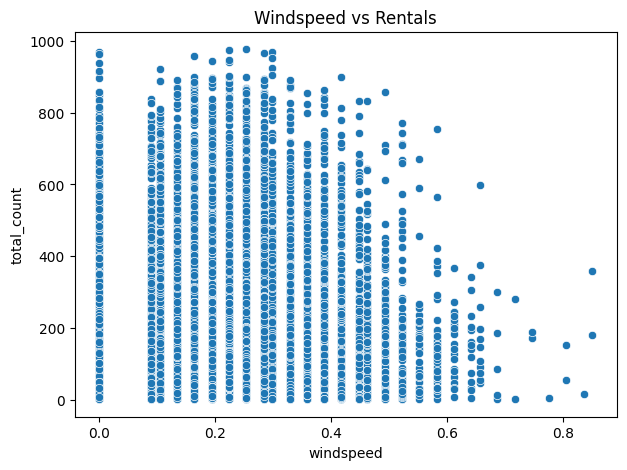

In [24]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=hour_df, x='windspeed', y='total_count')
plt.title("Windspeed vs Rentals")
plt.show()

#### Categorical weather situation

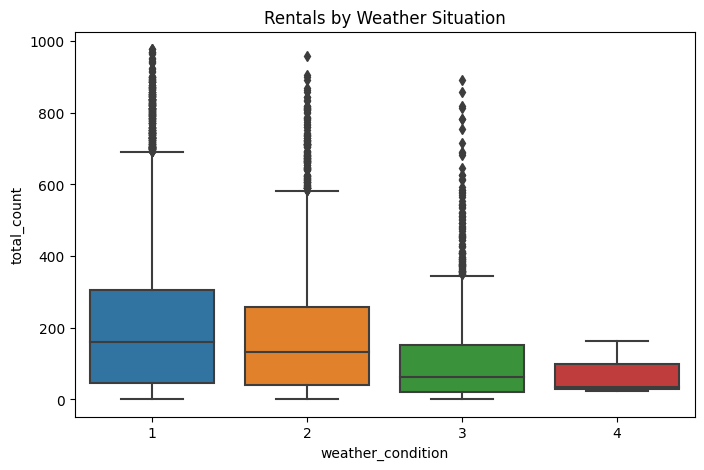

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=hour_df, x='weather_condition', y='total_count')
plt.title("Rentals by Weather Situation")
plt.show()

#### Workday vs non-workday

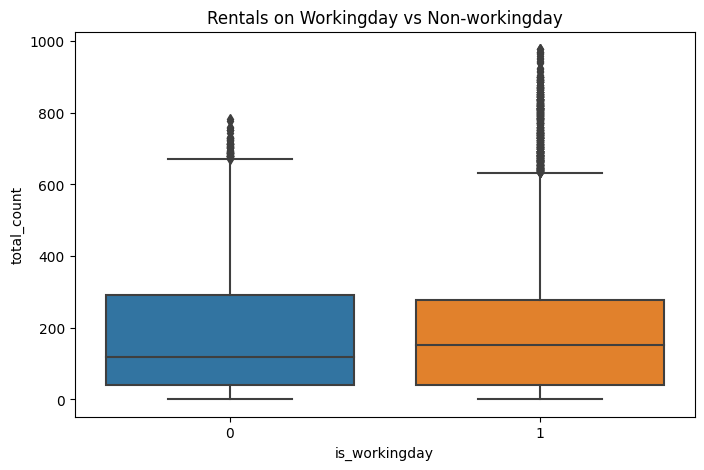

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=hour_df, x='is_workingday', y='total_count')
plt.title("Rentals on Workingday vs Non-workingday")
plt.show()

#### Holiday effect

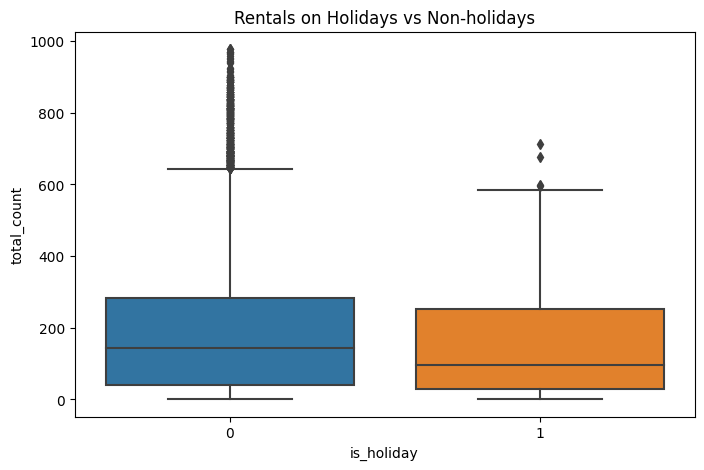

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=hour_df, x='is_holiday', y='total_count')
plt.title("Rentals on Holidays vs Non-holidays")
plt.show()

#### Rentals across weekdays

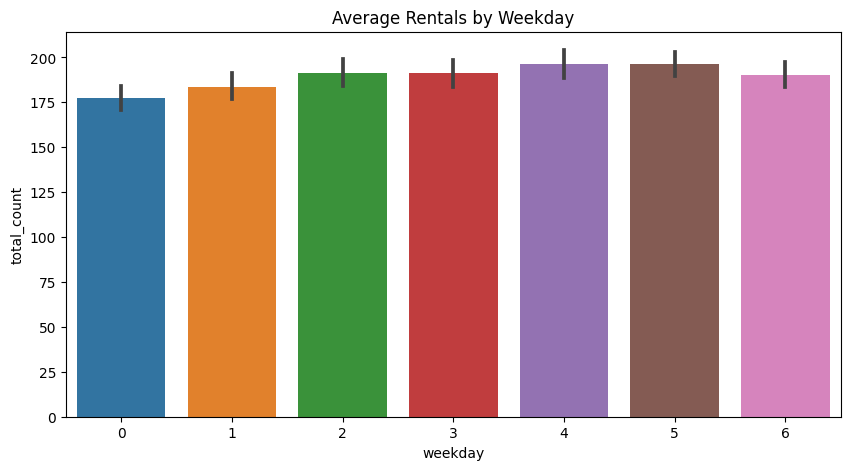

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(data=hour_df, x='weekday', y='total_count', estimator='mean')
plt.title("Average Rentals by Weekday")
plt.show()

#### Correlation Analysis

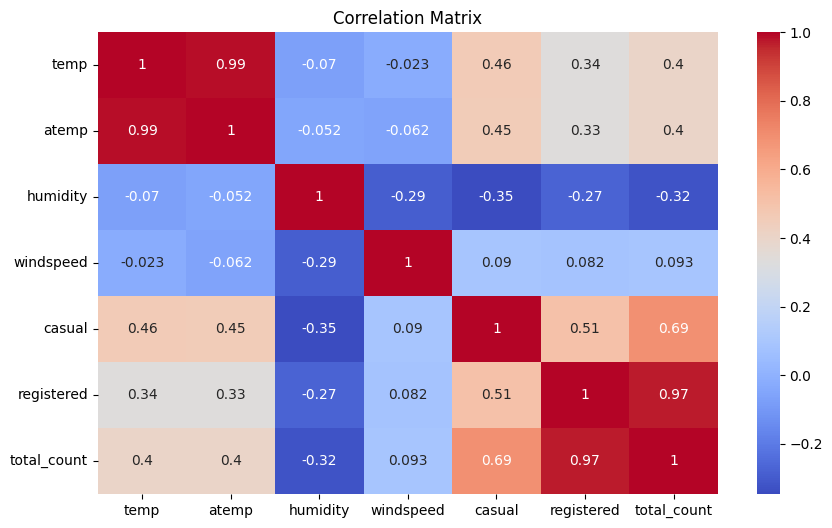

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(hour_df[['temp','atemp','humidity','windspeed','casual','registered','total_count']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#### Hourly pattern comparison

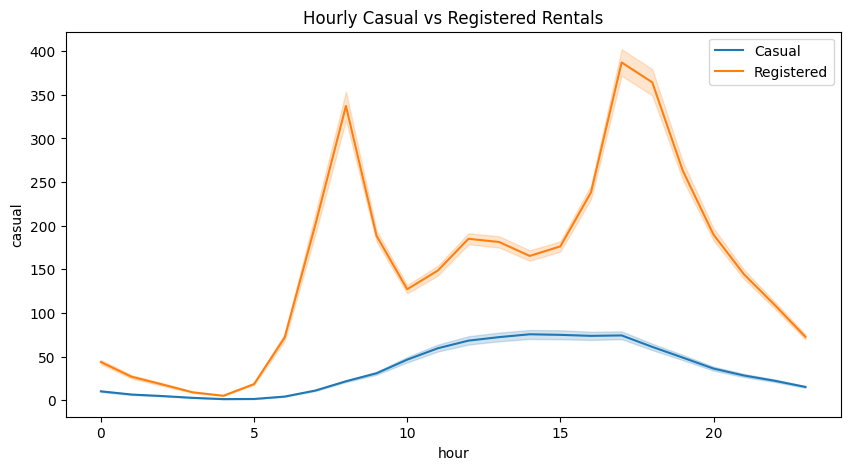

In [30]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hour_df, x='hour', y='casual', estimator='mean', label='Casual')
sns.lineplot(data=hour_df, x='hour', y='registered', estimator='mean', label='Registered')
plt.title("Hourly Casual vs Registered Rentals")
plt.legend()
plt.show()

#### Hour × Season

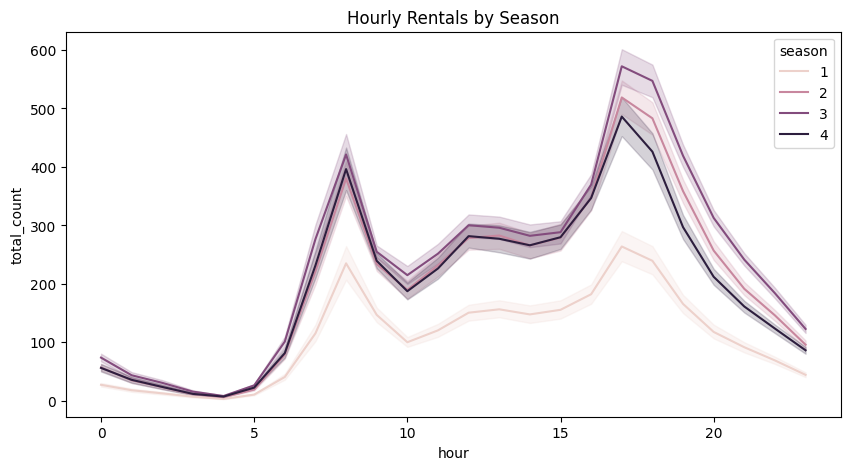

In [31]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=hour_df, x='hour', y='total_count', hue='season', estimator='mean')
plt.title("Hourly Rentals by Season")
plt.show()

#### Temp × Humidity heatmap

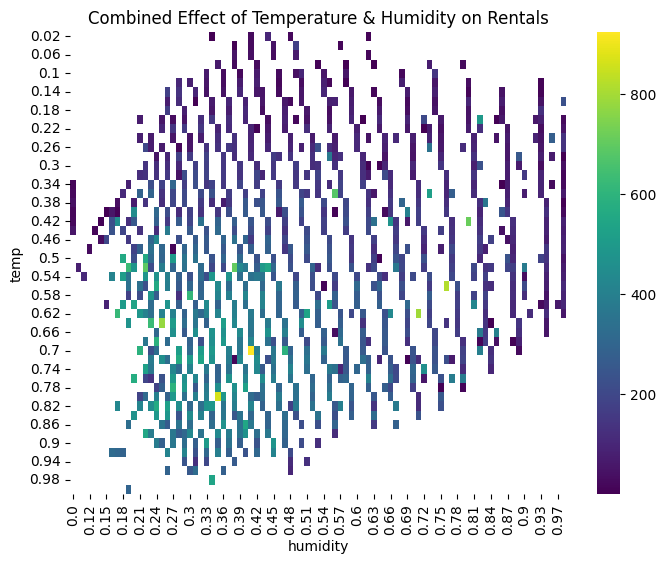

In [32]:
plt.figure(figsize=(8, 6))
pivot = hour_df.pivot_table(values='total_count', index='temp', columns='humidity', aggfunc='mean')
sns.heatmap(pivot, cmap='viridis')
plt.title("Combined Effect of Temperature & Humidity on Rentals")
plt.show()

#### Plots for outlier detection

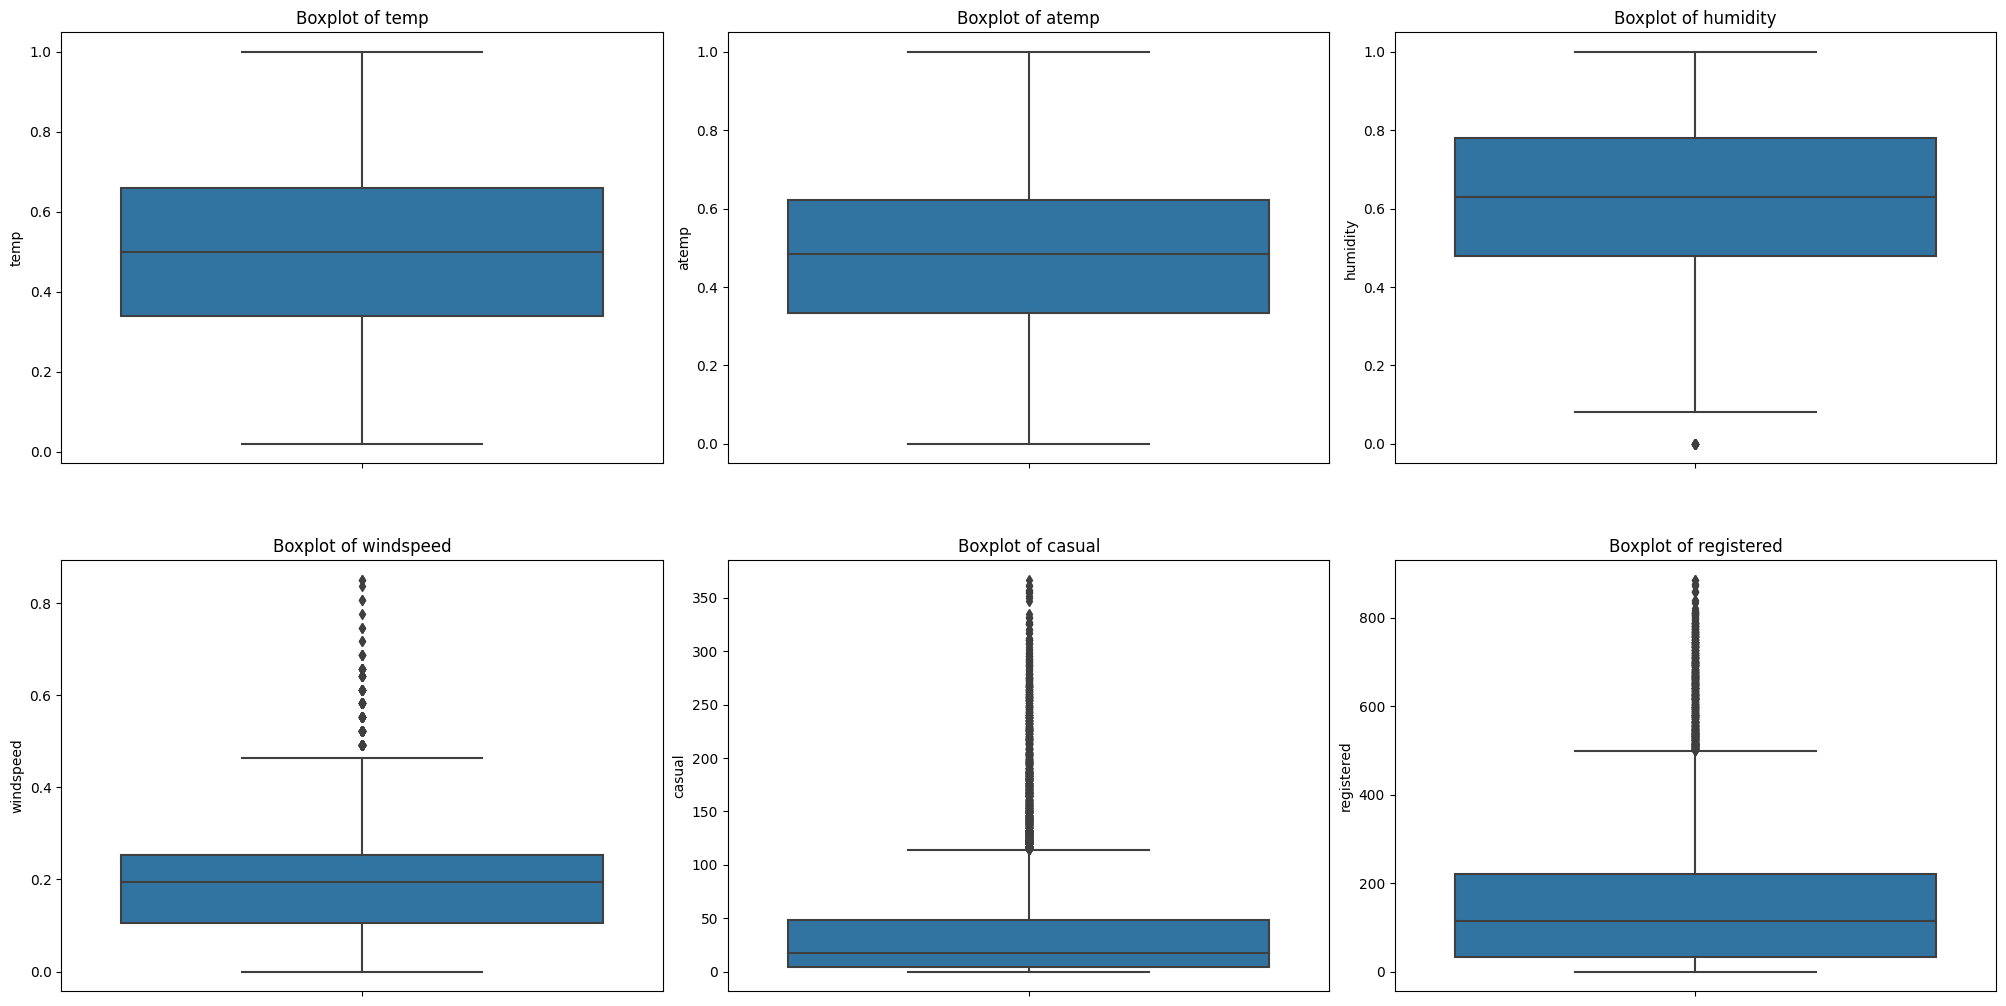

In [33]:
selected_cols = hour_df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']]

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
ax = ax.flatten()

index = 0
for col in selected_cols.columns:
    sns.boxplot(y=col, data=hour_df, ax=ax[index])
    ax[index].set_title(f"Boxplot of {col}")
    index += 1


for j in range(index, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

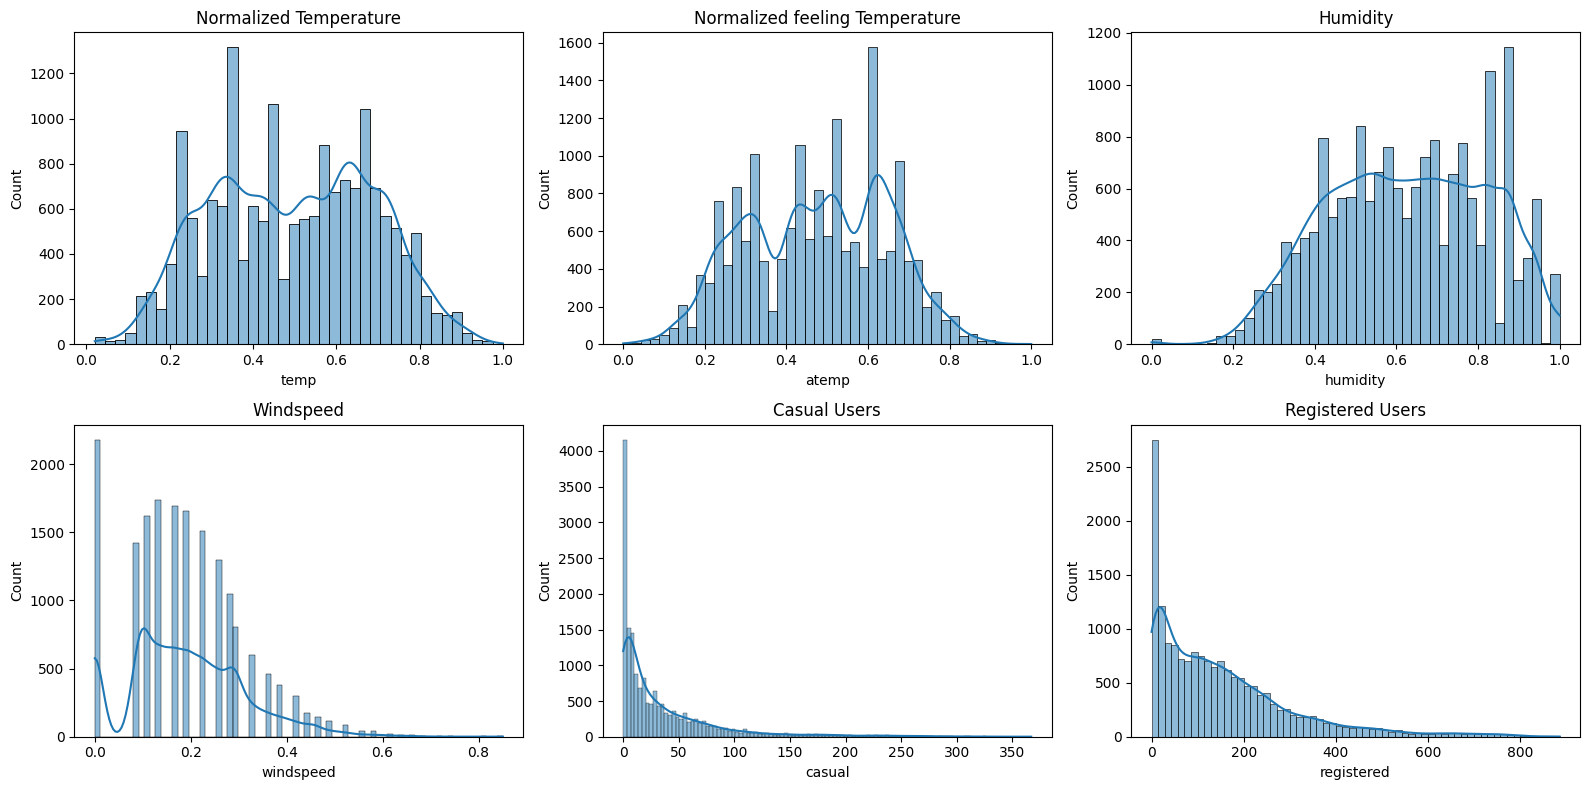

In [34]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
sns.histplot(hour_df['temp'], kde=True)
plt.title('Normalized Temperature')

plt.subplot(2, 3, 2)
sns.histplot(hour_df['atemp'], kde=True)
plt.title('Normalized feeling Temperature')

plt.subplot(2, 3, 3)
sns.histplot(hour_df['humidity'], kde=True)
plt.title('Humidity')

plt.subplot(2, 3, 4)
sns.histplot(hour_df['windspeed'], kde=True)
plt.title('Windspeed')

plt.subplot(2, 3, 5)
sns.histplot(hour_df['casual'], kde=True)
plt.title('Casual Users')

plt.subplot(2, 3, 6)
sns.histplot(hour_df['registered'], kde=True)
plt.title('Registered Users')

plt.tight_layout()
plt.show()

### Removing the Outliers 

In [35]:
def remove_outliers(df):
    df_clean = df.copy()
    
    
    weather_cols = ['temp', 'atemp', 'humidity']
    for col in weather_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    

    windspeed_99 = df_clean['windspeed'].quantile(0.99)
    df_clean = df_clean[df_clean['windspeed'] <= windspeed_99]
    
        
    return df_clean

hour_df_clean = remove_outliers(hour_df)
print(f"Original shape: {hour_df.shape}")
print(f"After outlier removal: {hour_df_clean.shape}")
print(f"Rows removed: {hour_df.shape[0] - hour_df_clean.shape[0]}")

Original shape: (17379, 16)
After outlier removal: (17212, 16)
Rows removed: 167


In [36]:
hour_df_clean.head()


,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
rec_id,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [37]:
hour_df_clean.columns

Index(['datetime', 'season', 'year', 'month', 'hour', 'is_holiday', 'weekday',
       'is_workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [38]:
def feature_engineering(df):
    df = df.copy()


    df['datetime'] = pd.to_datetime(df['datetime'])


    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    df['weekday'] = df['datetime'].dt.weekday
    df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)


    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)
    df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
    df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)

 
    df['temp_humidity'] = df['temp'] * df['humidity']
    df['hour_temp'] = df['hour'] * df['temp']
    df['hour_humidity'] = df['hour'] * df['humidity']

    df['lag_1'] = df['total_count'].shift(1)
    df['lag_2'] = df['total_count'].shift(2)
    df['lag_3'] = df['total_count'].shift(3)
    df['lag_6'] = df['total_count'].shift(6)
    df['lag_24'] = df['total_count'].shift(24)

    df.fillna(method='bfill', inplace=True)

    df['rolling_3'] = df['total_count'].rolling(3).mean()
    df['rolling_6'] = df['total_count'].rolling(6).mean()
    df['rolling_12'] = df['total_count'].rolling(12).mean()

    df.fillna(method='bfill', inplace=True)


    df = pd.get_dummies(df, columns=['season', 'weather_condition'], drop_first=True)

    df['temp_atemp_ratio'] = df['temp'] / (df['atemp'] + 1e-6)

    df.drop([
        'datetime', 
        'casual', 
        'registered',
        'month',    
        'hour',     
        'weekday',  
    ], axis=1, inplace=True)

    return df


In [39]:
final_df = feature_engineering(hour_df_clean)

### Train Test Split

In [40]:
X = final_df.drop(columns=['total_count'])
y = final_df['total_count']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)


### Standard Scaling and Polynomial features (Linear Regression)

In [41]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [43]:
LR = LinearRegression()
LR.fit(X_train_poly, y_train)

LinearRegression()

### Evaluation metrics

In [44]:
y_pred = LR.predict(X_test_poly)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.0861
Mean Squared Error (MSE): 13.7403
Root Mean Squared Error (RMSE): 3.7068
R² Score: 0.9996


### Visualize the prediction

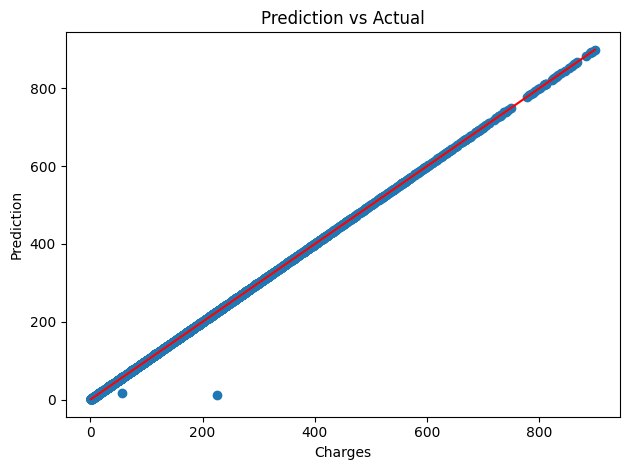

In [45]:
plt.scatter(y_pred, y_test)
plt.plot(np.linspace(y_pred.min(), y_pred.max()), np.linspace(y_test.min(),y_test.max()),color='red')
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs Actual')
plt.tight_layout()
plt.show()

### Random Forest

In [46]:


rf = RandomForestRegressor(n_estimators=300, random_state=42)
rf.fit(X_train_scaled, y_train)




RandomForestRegressor(n_estimators=300, random_state=42)

### Gradient Boosting

In [47]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)




GradientBoostingRegressor(random_state=42)

### XGBoost

In [48]:
xgb = XGBRegressor(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42
)
xgb.fit(X_train_scaled, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Decision Tree

In [49]:
dt = DecisionTreeRegressor(
    criterion='squared_error',  
    max_depth=4,
    max_features=None,
    max_leaf_nodes=10,
    min_samples_leaf=1,
    min_samples_split=5,
    min_weight_fraction_leaf=0.0,
    min_impurity_decrease=0.0,
    splitter='best',
    random_state=42
)

dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10, min_samples_split=5,
                      random_state=42)

In [50]:



def evaluate_regression(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"MAE :  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² :   {r2:.4f}")

In [51]:
models = {
    "Linear Regression": LR,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Gradient Boosting": gbr,
    "XGBoost": xgb
}

for name, model in models.items():
    print(f"----- {name} -----")

    if model == LR:
        evaluate_regression(model, X_test_poly, y_test)
    else: 
        evaluate_regression(model, X_test_scaled, y_test)
           
    print("\n")

----- Linear Regression -----
MAE :  0.0861
MSE:  13.7403
RMSE: 3.7068
R² :   0.9996


----- Decision Tree -----
MAE :  50.4670
MSE:  5247.2189
RMSE: 72.4377
R² :   0.8326


----- Random Forest -----
MAE :  9.7748
MSE:  284.7010
RMSE: 16.8731
R² :   0.9909


----- Gradient Boosting -----
MAE :  19.2677
MSE:  776.9869
RMSE: 27.8745
R² :   0.9752


----- XGBoost -----
MAE :  9.3885
MSE:  220.4823
RMSE: 14.8486
R² :   0.9930


